# imports libraries

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import datas

In [6]:
# import datas to dataframes
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png
...,...,...,...,...,...
1709,0,3.819464,117.636112,2016,train_test_data/train/550.png
1710,0,-1.809594,111.531951,2005,train_test_data/train/2264.png
1711,1,0.443397,112.200163,2012,train_test_data/train/1486.png
1712,2,-1.978349,101.970148,2012,train_test_data/train/1170.png


In [7]:
df_test

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png
...,...,...,...,...
630,1.650899,101.314723,2011,train_test_data/test/968.png
631,-1.645649,102.612332,2010,train_test_data/test/54.png
632,-0.557796,114.561609,2016,train_test_data/test/494.png
633,-3.037549,113.872045,2009,train_test_data/test/287.png


# data exploration

## general

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      635 non-null    float64
 1   longitude     635 non-null    float64
 2   year          635 non-null    int64  
 3   example_path  635 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 20.0+ KB


In [29]:
# we check that there are no nulls
df_train.isnull().sum()

label           0
latitude        0
longitude       0
year            0
example_path    0
dtype: int64

In [30]:
df_test.isnull().sum()

latitude        0
longitude       0
year            0
example_path    0
dtype: int64

In [31]:
# we check the years of the data
df_train.sort_values('year')['year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

## one image

In [32]:
# extract the path of the first image
path = df_train.iloc[0]['example_path']
path

'train_test_data/train/1297.png'

In [33]:
# extract the first image
image = plt.imread(path)

In [20]:
image

array([[[0.1764706 , 0.23137255, 0.21960784],
        [0.15686275, 0.21176471, 0.2       ],
        [0.11372549, 0.16470589, 0.15294118],
        ...,
        [0.07058824, 0.10980392, 0.06666667],
        [0.07058824, 0.11372549, 0.06666667],
        [0.07843138, 0.12156863, 0.07450981]],

       [[0.19215687, 0.24705882, 0.23529412],
        [0.16862746, 0.21960784, 0.20392157],
        [0.11764706, 0.16862746, 0.15294118],
        ...,
        [0.08235294, 0.11764706, 0.08235294],
        [0.08235294, 0.11764706, 0.07450981],
        [0.07450981, 0.10980392, 0.05490196]],

       [[0.16862746, 0.21960784, 0.20784314],
        [0.12941177, 0.1764706 , 0.14901961],
        [0.09411765, 0.14117648, 0.11372549],
        ...,
        [0.12941177, 0.16078432, 0.12941177],
        [0.10980392, 0.14117648, 0.09019608],
        [0.09411765, 0.1254902 , 0.07058824]],

       ...,

       [[0.07058824, 0.11372549, 0.10980392],
        [0.07058824, 0.11372549, 0.10588235],
        [0.07450981, 0

In [27]:
image.shape

(332, 332, 3)

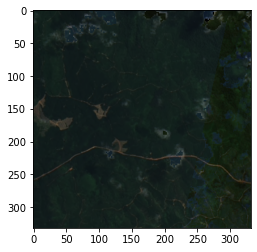

In [21]:
plt.imshow(image)
plt.show()

Each image is a tridimensional array: 332 pixels and the quantity of each 3 primary color

In [36]:
image2 = image.reshape(image.shape[0], -1).T

In [37]:
image2.shape

(996, 332)